In [11]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
plt.style.use("seaborn")  # plot style

sns.set_palette([  # the "R4" palette
    "#000000", "#DF536B", "#61D04F", "#2297E6",
    "#28E2E5", "#CD0BBC", "#F5C710", "#999999"
])

plt.rcParams.update({
    "font.size":         11,
    "font.family":       "sans-serif",
    "font.sans-serif":   ["Alegreya Sans", "Alegreya"],
    "figure.autolayout": True,
    "figure.dpi":        300,
    "figure.figsize":    (6, 3.5),  # default is [8.0, 5.5],
})

In [2]:
aposts = pd.read_xml("android-data/Posts.xml", parser = 'etree')
apple_posts = pd.read_xml("apple-data/Posts.xml", parser = 'etree')

In [3]:
iposts = pd.read_xml("apple-data/Posts.xml", parser = 'etree')
iposts["Tags"] = iposts["Tags"].astype("string")
iposts = iposts[iposts["Tags"].str.contains("iphone")]

# Do badania
1. Ile procent postów ma w ogóle odpowiedź?
2. Ile postów procentowo ma zaakceptowaną odpowiedź?

In [4]:
def hasAnswer(posts_all, iaposts, brand):
    #parents = aposts["ParentId"].drop_duplicates()
    answers = posts_all[pd.notna(posts_all["ParentId"])] # answers only (ignore tags)
    answers = answers.groupby("ParentId")["Id"].count()
    answers.name = 'AnswerCount'
    answers = answers.reset_index()
    
    iaposts = iaposts[pd.isna(iaposts["ParentId"])] # questions only (tagged posts here)
    questions = pd.merge(\
        how='left', \
        left=iaposts.loc[:, ("Id")], \
        right=answers, \
        left_on="Id", \
        right_on='ParentId')
    questions = questions.loc[:, ('Id', 'AnswerCount')]
    questions["hasAnswer"] = np.where(pd.notna(questions["AnswerCount"]), True, False)

    x = questions.groupby("hasAnswer")["hasAnswer"].count()

    x.plot.pie(colors=['palevioletred', 'royalblue'], autopct = "%.2f%%", ylabel='Post has answer')
    plt.title(brand)
    plt.show()

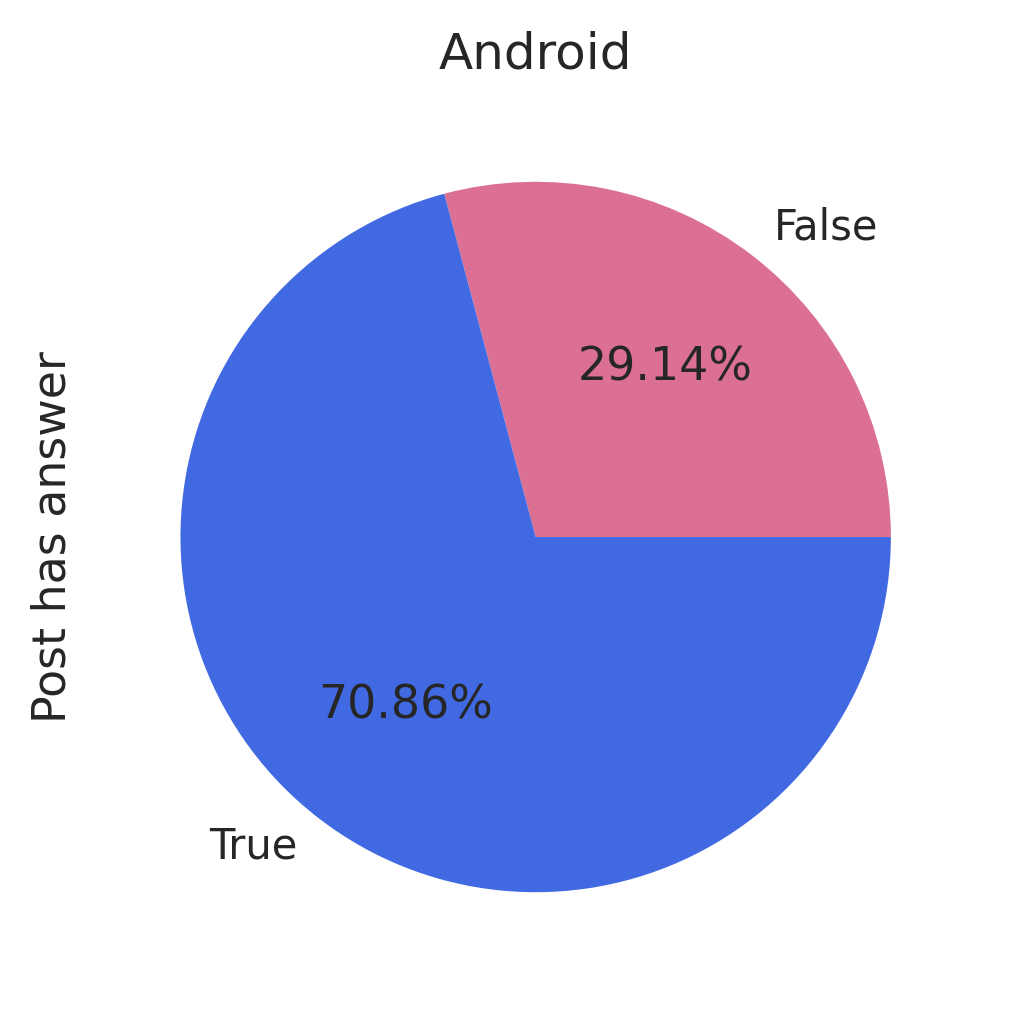

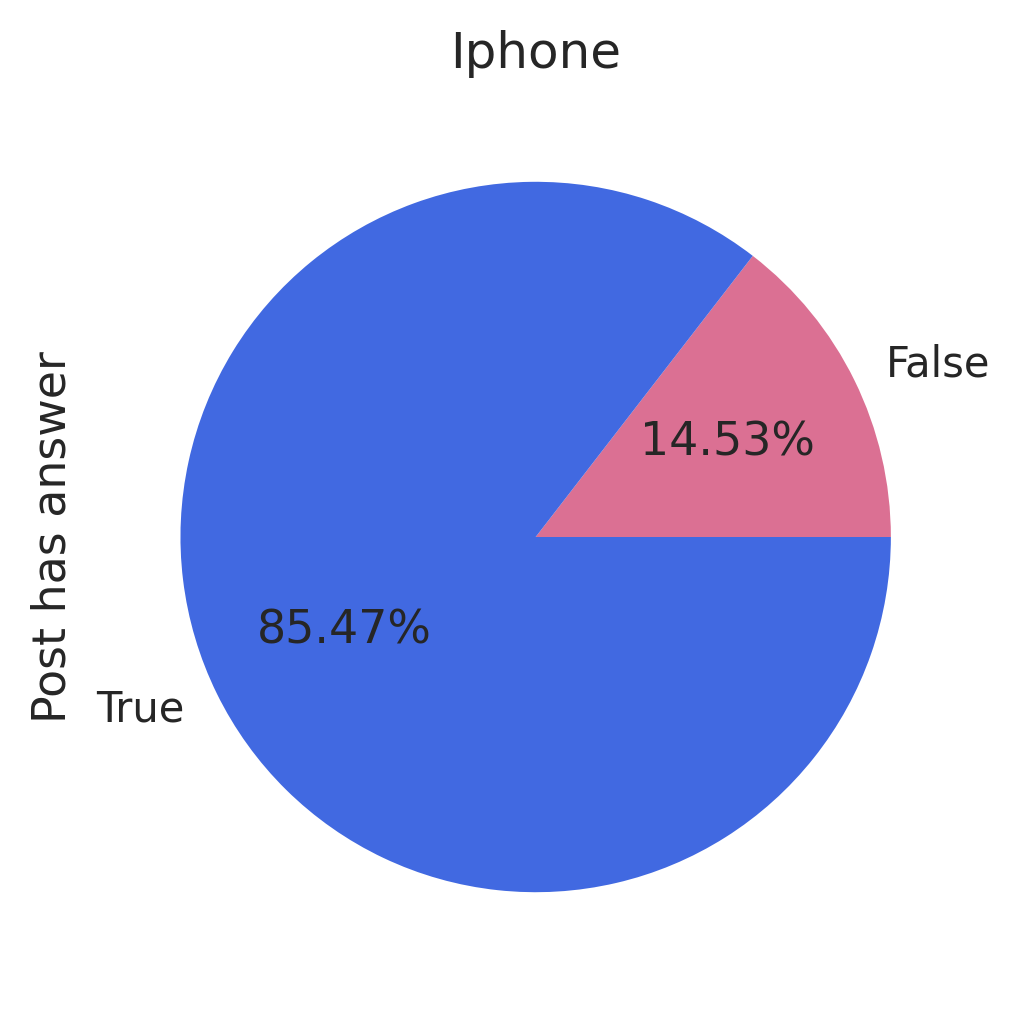

In [12]:
hasAnswer(aposts, aposts, "Android")
hasAnswer(apple_posts, iposts, "Iphone")

In [6]:
# 2
def hasAcceptedAnswer(posts, brand):
    posts = posts[pd.isna(posts["ParentId"])]
    posts["HasAcceptedAnswer"] = np.where(pd.isna(posts["AcceptedAnswerId"]), True, False)
    
    x = posts.groupby("HasAcceptedAnswer")["HasAcceptedAnswer"].count()
    x.plot.pie(colors=['pink', 'royalblue'], autopct = "%.2f%%", ylabel='Post has accepted answer')
    plt.title(brand)
    plt.show()


/tmp/ipykernel_4386/3699368189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["HasAcceptedAnswer"] = np.where(pd.isna(posts["AcceptedAnswerId"]), True, False)


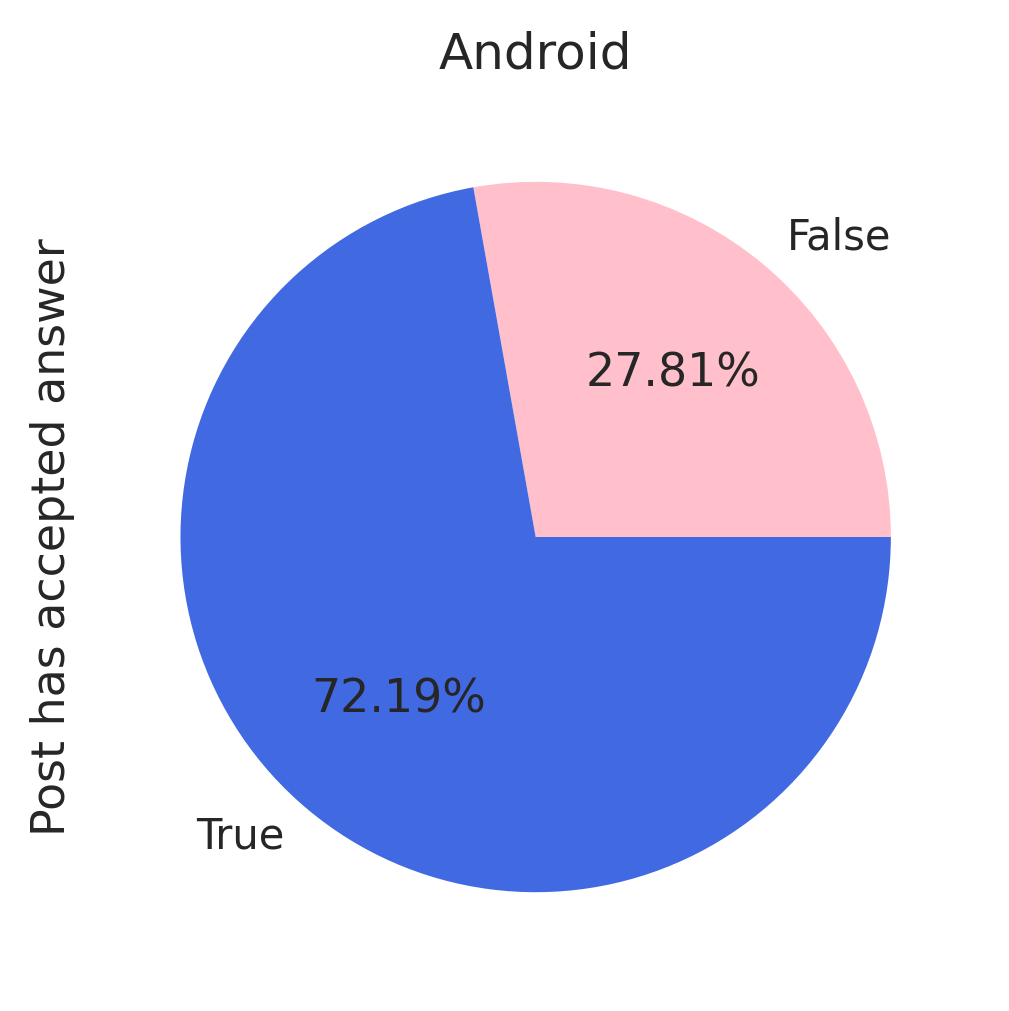

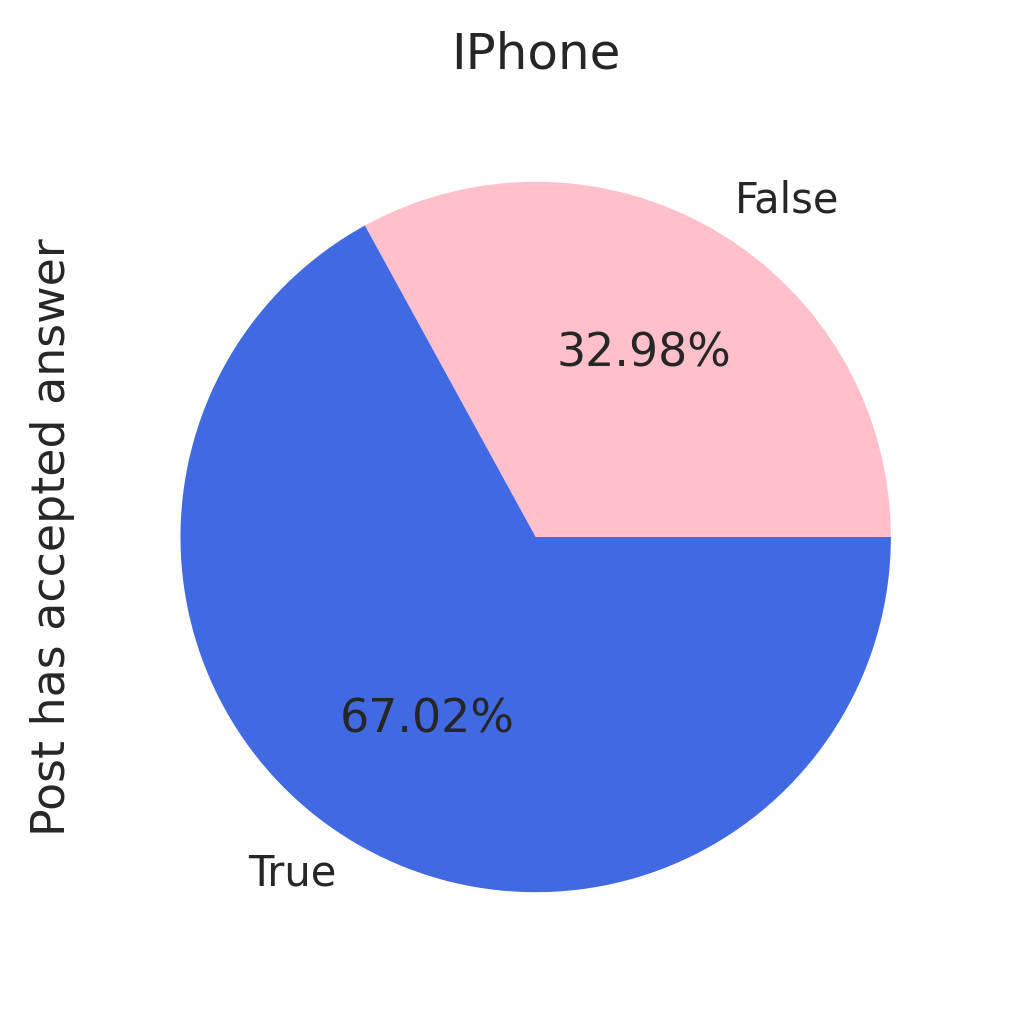

In [13]:
hasAcceptedAnswer(aposts, "Android")
hasAcceptedAnswer(iposts, "IPhone")

In [8]:
# 3
def boxplotAnswerCount(posts_all, iaposts):
    answers = posts_all[pd.notna(posts_all["ParentId"])] # answers only (ignore tags)
    answers = answers.groupby("ParentId")["Id"].count()
    answers.name = 'AnswerCount'
    answers = answers.reset_index()

    iaposts = iaposts[pd.isna(iaposts["ParentId"])] # questions only (tagged posts here)
    questions = pd.merge(\
        how='left', \
        left=iaposts.loc[:, ("Id")], \
        right=answers, \
        left_on="Id", \
        right_on='ParentId')
    questions["AnswerCount"] = questions["AnswerCount"].fillna(0)

    return questions["AnswerCount"]

    # plt.boxplot(questions.AnswerCount, showfliers=False, \
    # vert=False, showmeans=True, meanline=True)
    # plt.title(brand + ": number of answers")
    # plt.show()

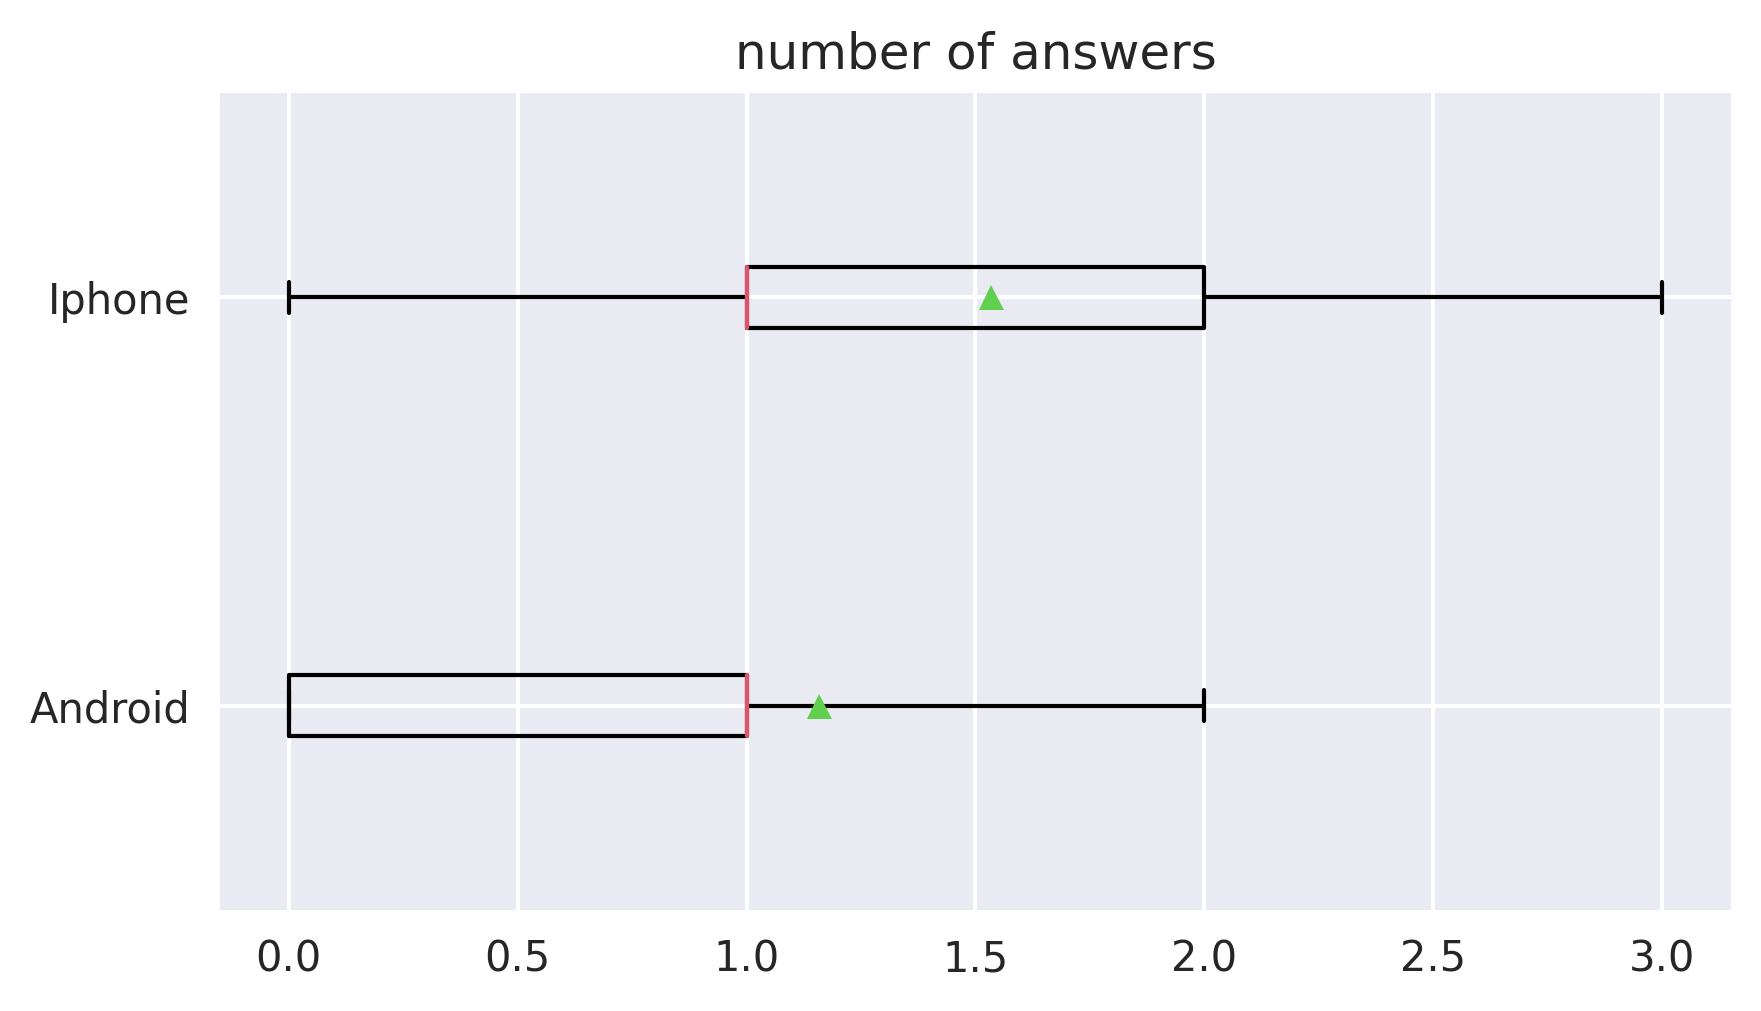

In [14]:
aq = boxplotAnswerCount(aposts, aposts)
iq = boxplotAnswerCount(apple_posts, iposts)

dict = {"Android" : aq, "Iphone" : iq}
fig, ax = plt.subplots()
ax.boxplot(dict.values(), \
    showfliers=False, vert=False, showmeans=True,)
ax.set_yticklabels(dict.keys())
plt.title("number of answers")
plt.show()